# Import Libraries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
confusion_matrix, ConfusionMatrixDisplay,
accuracy_score, precision_score, recall_score,
f1_score, roc_auc_score, roc_curve
)

# Load Dataset Automatically from GitHub

In [87]:
GITHUB_RAW_URL = "https://raw.githubusercontent.com/Rifat210133/Machine_Learning/refs/heads/main/breast_cancer_dataset.csv"


df = pd.read_csv(GITHUB_RAW_URL)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Basic Inspection

In [88]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


# Separate Features & Target

In [89]:
TARGET_COLUMN = 'diagnosis'

X = df.drop(columns=[TARGET_COLUMN, 'Unnamed: 32'], errors='ignore')
y = df[TARGET_COLUMN]
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)   # B=0, M=1

# Identify Column Types

In [90]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing Pipeline

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerical_cols)
])


# Train / Test Split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)

# CART Model (Gini) + Cross‑Validation

In [93]:
cart_pipeline = Pipeline([
('preprocess', preprocessor),
('model', DecisionTreeClassifier(criterion='gini', random_state=42))
])


cart_params = {
'model__max_depth': [2, 3, 4, 5, None],
'model__min_samples_split': [2, 5, 10]
}


cart_cv = GridSearchCV(cart_pipeline, cart_params, cv=5, scoring='accuracy')
cart_cv.fit(X_train, y_train)


best_cart = cart_cv.best_estimator_

# ID3 Model (Entropy) + Cross‑Validation

In [94]:
id3_pipeline = Pipeline([
('preprocess', preprocessor),
('model', DecisionTreeClassifier(criterion='entropy', random_state=42))
])


id3_params = {
'model__max_depth': [2, 3, 4, 5, None],
'model__min_samples_split': [2, 5, 10]
}


id3_cv = GridSearchCV(id3_pipeline, id3_params, cv=5, scoring='accuracy')
id3_cv.fit(X_train, y_train)


best_id3 = id3_cv.best_estimator_

# Predictions & Probabilities

In [95]:
models = {'CART': best_cart, 'ID3': best_id3}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auc': roc_auc_score(y_test, y_prob),
        'cm': confusion_matrix(y_test, y_pred),
        'fpr_tpr': roc_curve(y_test, y_prob)
    }


# 2D Decision Boundary

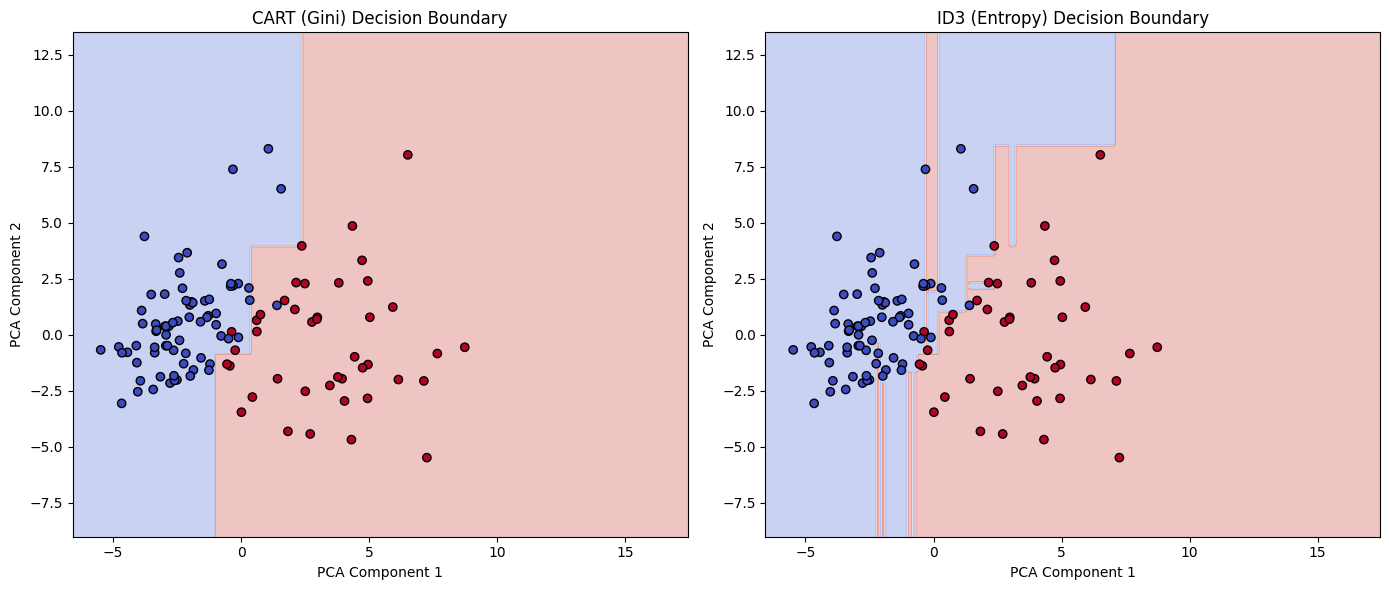

In [96]:
from sklearn.decomposition import PCA

# Prepare data for 2D visualization
# Apply preprocessing to X and then PCA
X_processed = preprocessor.fit_transform(X)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_processed)

# Split 2D data
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.2, random_state=42, stratify=y
)

# Train CART model on 2D data
cart_2d_model = DecisionTreeClassifier(criterion=best_cart.named_steps['model'].criterion,
                                       max_depth=best_cart.named_steps['model'].max_depth,
                                       min_samples_split=best_cart.named_steps['model'].min_samples_split,
                                       random_state=42)
cart_2d_model.fit(X_train_2d, y_train_2d)

# Train ID3 model on 2D data
id3_2d_model = DecisionTreeClassifier(criterion=best_id3.named_steps['model'].criterion,
                                      max_depth=best_id3.named_steps['model'].max_depth,
                                      min_samples_split=best_id3.named_steps['model'].min_samples_split,
                                      random_state=42)
id3_2d_model.fit(X_train_2d, y_train_2d)

# Create a meshgrid for plotting the decision boundary
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the meshgrid for CART
Z_cart = cart_2d_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_cart = Z_cart.reshape(xx.shape)

# Predict on the meshgrid for ID3
Z_id3 = id3_2d_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_id3 = Z_id3.reshape(xx.shape)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# CART
axes[0].contourf(xx, yy, Z_cart, alpha=0.3, cmap=plt.cm.coolwarm)
axes[0].scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test_2d, edgecolor='k', cmap=plt.cm.coolwarm)
axes[0].set_title('CART (Gini) Decision Boundary')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')

# ID3
axes[1].contourf(xx, yy, Z_id3, alpha=0.3, cmap=plt.cm.coolwarm)
axes[1].scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test_2d, edgecolor='k', cmap=plt.cm.coolwarm)
axes[1].set_title('ID3 (Entropy) Decision Boundary')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

# Confusion Matrix (2×1)

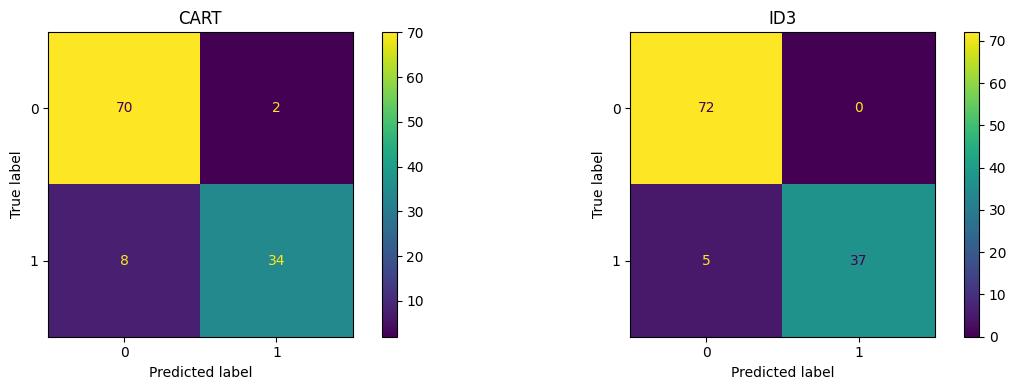

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


for ax, (name, res) in zip(axes, results.items()):
    ConfusionMatrixDisplay(res['cm'], display_labels=best_cart.named_steps['model'].classes_).plot(ax=ax)
    ax.set_title(name)


plt.tight_layout()
plt.show()

# ROC Curve (2×1)

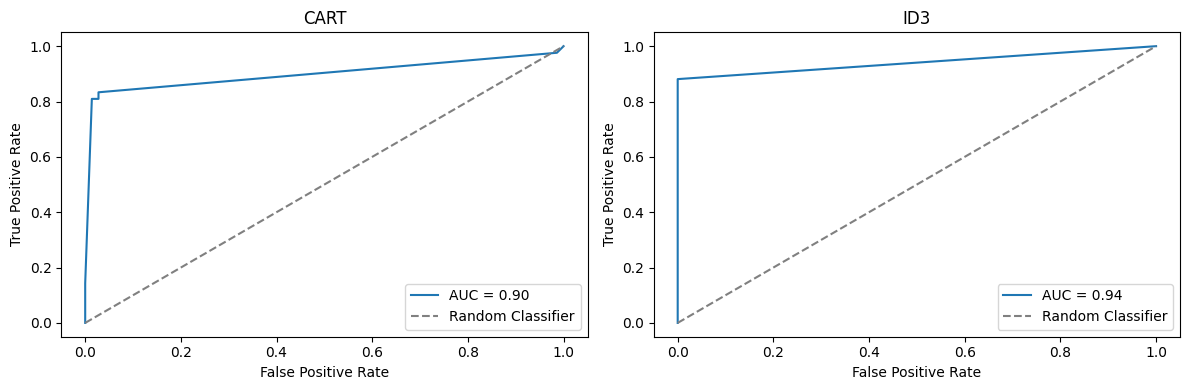

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


for ax, (name, res) in zip(axes, results.items()):
    fpr, tpr, _ = res['fpr_tpr']
    ax.plot(fpr, tpr, label=f'AUC = {res["auc"]:.2f}')
    ax.plot([0,1],[0,1],'--', color='gray', label='Random Classifier')
    ax.set_title(name)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend()


plt.tight_layout()
plt.show()

# Evaluation Metrics Bar Chart (Combined)

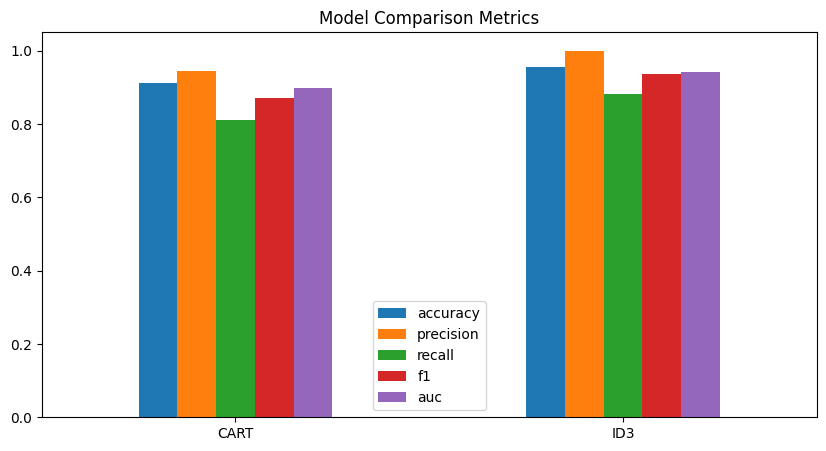

In [99]:
metrics_df = pd.DataFrame(results).T[['accuracy','precision','recall','f1','auc']]
metrics_df.plot(kind='bar', figsize=(10,5))
plt.title('Model Comparison Metrics')
plt.xticks(rotation=0)
plt.show()

# Decision Tree Structure Visualization

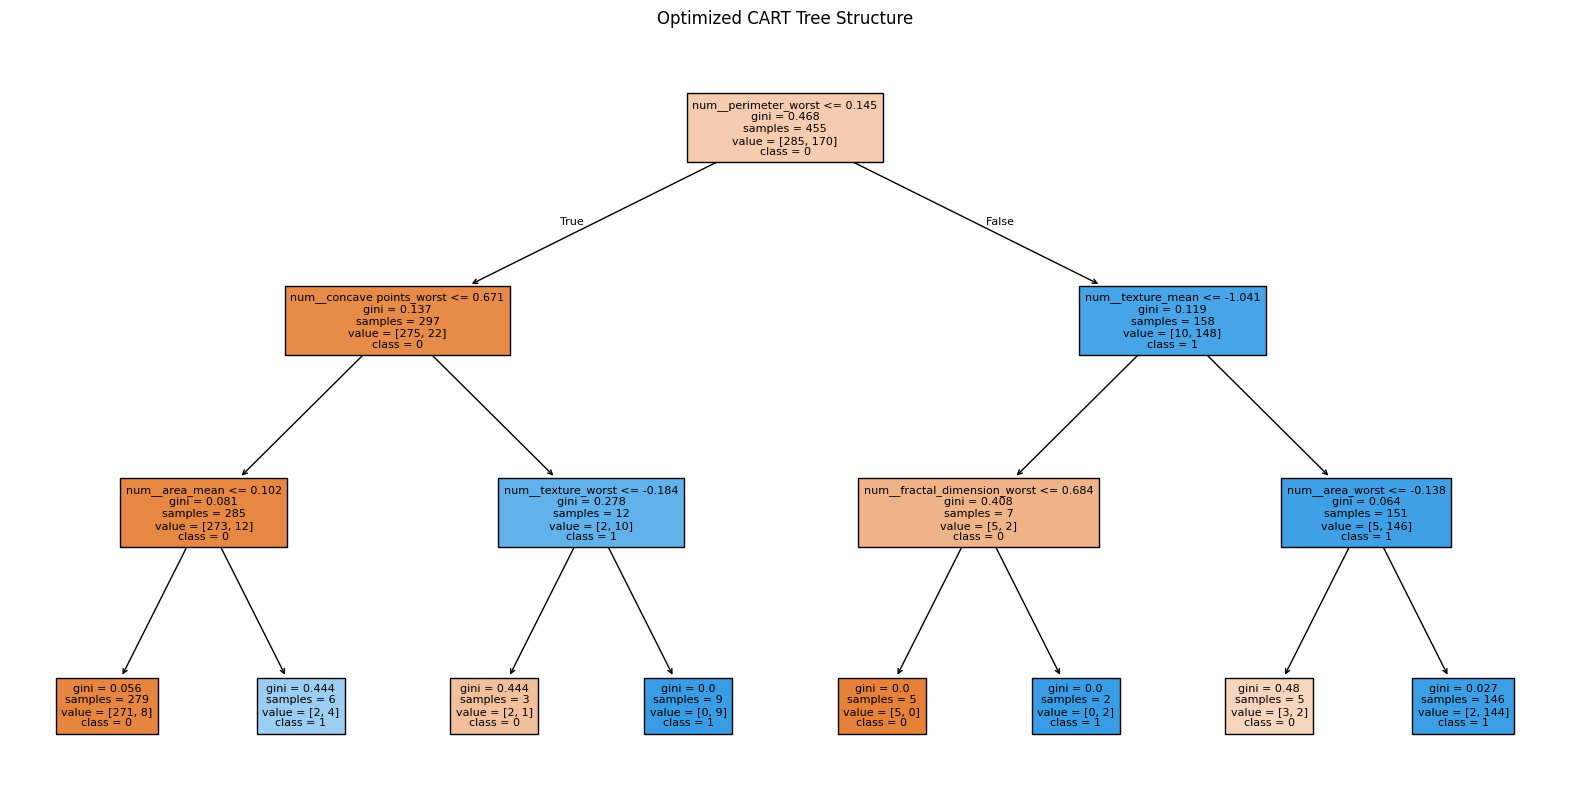

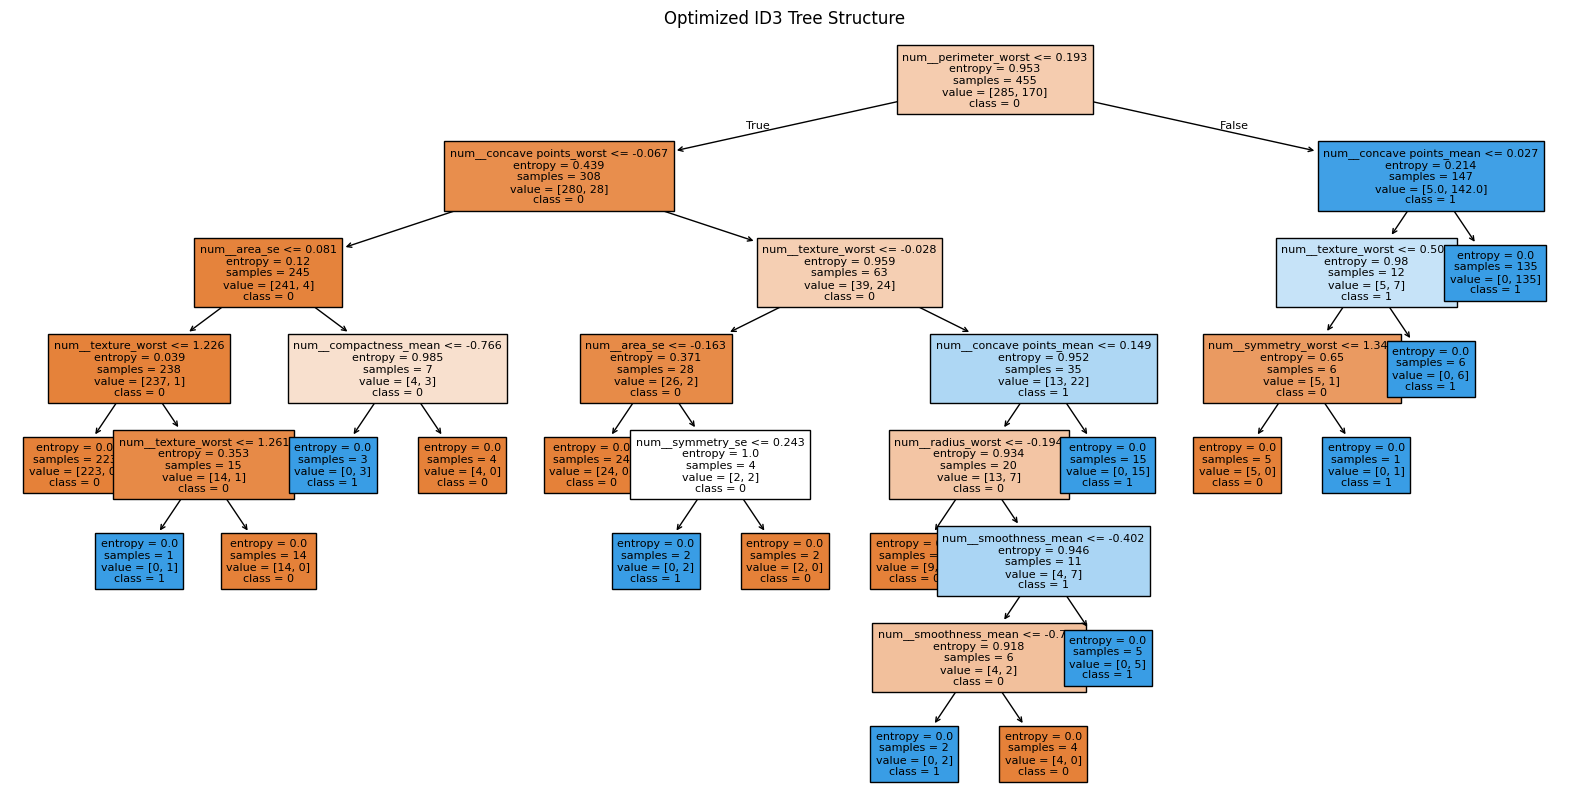

In [100]:
plt.figure(figsize=(20, 10))
plot_tree(
    best_cart.named_steps['model'],
    feature_names=best_cart.named_steps['preprocess'].get_feature_names_out(),
    class_names=best_cart.named_steps['model'].classes_.astype(str),
    filled=True,
    fontsize=8
)
plt.title('Optimized CART Tree Structure')
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(
    best_id3.named_steps['model'],
    feature_names=best_id3.named_steps['preprocess'].get_feature_names_out(),
    class_names=best_id3.named_steps['model'].classes_.astype(str),
    filled=True,
    fontsize=8
)
plt.title('Optimized ID3 Tree Structure')
plt.show()